<font color="#0055FF" size="5"><b>YOLOv5 </b></font>
<font color="#337BFF" size="5"><b>Aquatic </b></font>
<font color="#66A3FF" size="5"><b>Species </b></font>
<font color="#99C2FF" size="5"><b>Detection </b></font>
<font color="#B3D0FF" size="5"><b>and </b></font>
<font color="#CCE2FF" size="5"><b>Classification </b></font>

#About The Dataset:
https://www.kaggle.com/datasets/slavkoprytula/aquarium-data-cots

Info:

The dataset contains 7 classes of underwater creatures with provided bboxes locations for every animal.

The dataset is already split into the train(448), validation(127), and test(63) sets.

Data
It includes 638 images.

- Creatures are annotated in YOLO v5 PyTorch format
Pre-Processing
The following pre-processing was applied to each image:

- Auto-orientation of pixel data (with EXIF-orientation stripping)
Resize to 1024x1024 (Fit within)

- classes = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

In [ ]:
# Clone YOLOv5 Repository and Install Dependencies

!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -U -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16953, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16953 (delta 75), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16953/16953), 15.70 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (11604/11604), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 387.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
  Using cached setuptools-74.1.2-py3-none-any.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 24.4 MB/s eta 0:00:00

In [ ]:
#Download and Extract Dataset

import os

os.environ['KAGGLE_USERNAME'] = 'ziaiemahsa'
os.environ['KAGGLE_KEY'] = 'kaggle datasets download -d slavkoprytula/aquarium-data-cots'

!kaggle datasets download -d slavkoprytula/aquarium-data-cots

!unzip aquarium-data-cots.zip

Dataset URL: https://www.kaggle.com/datasets/slavkoprytula/aquarium-data-cots
License(s): CC0-1.0
 87% 58.0M/66.6M [00:00<00:00, 203MB/s]
100% 66.6M/66.6M [00:00<00:00, 203MB/s]
Archive:  aquarium-data-cots.zip
  inflating: aquarium_pretrain/README.dataset.txt  
  inflating: aquarium_pretrain/README.roboflow.txt  
  inflating: aquarium_pretrain/data.yaml  
  inflating: aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg  
  inflating: aquarium_p

In [ ]:
dataset_path = '/content/aquarium_pretrain'
data_yaml_path = f'{dataset_path}/data.yaml'

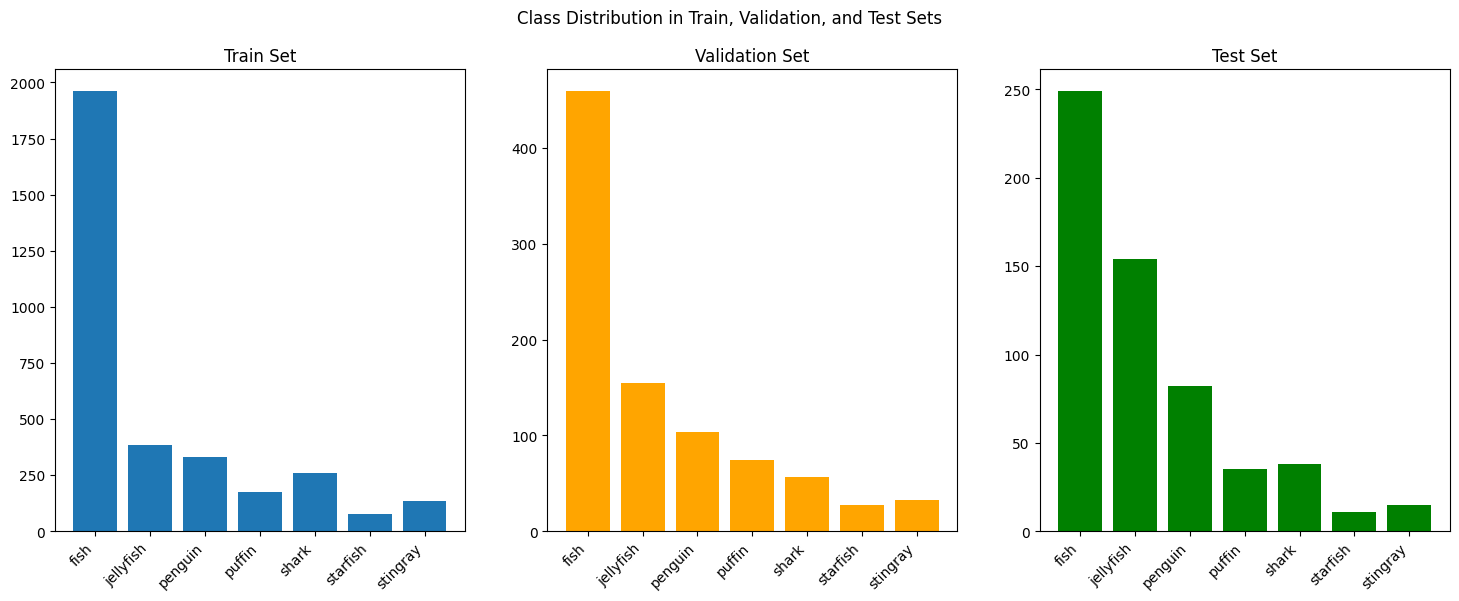

In [ ]:
# Visualization at the Beginning: Class Distribution in Train, Validation, and Test Sets
def count_instances(path):
    count_dict = {cls: 0 for cls in classes}
    for label_file in os.listdir(path):
        if label_file.endswith('.txt'):
            with open(os.path.join(path, label_file)) as f:
                labels = f.readlines()
                for label in labels:
                    class_idx = int(label.split()[0])
                    count_dict[classes[class_idx]] += 1
    return count_dict


# Load the dataset configuration file
import yaml

with open(data_yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

classes = data_config['names']


train_count = count_instances(f'{dataset_path}/train/labels')
val_count = count_instances(f'{dataset_path}/valid/labels')
test_count = count_instances(f'{dataset_path}/test/labels')


# Plot the class distribution
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Class Distribution in Train, Validation, and Test Sets')

axs[0].bar(train_count.keys(), train_count.values())
axs[0].set_title('Train Set')
axs[0].set_xticks(range(len(train_count)))
axs[0].set_xticklabels(train_count.keys(), rotation=45, ha='right')

axs[1].bar(val_count.keys(), val_count.values(), color='orange')
axs[1].set_title('Validation Set')
axs[1].set_xticks(range(len(val_count)))
axs[1].set_xticklabels(val_count.keys(), rotation=45, ha='right')

axs[2].bar(test_count.keys(), test_count.values(), color='green')
axs[2].set_title('Test Set')
axs[2].set_xticks(range(len(test_count)))
axs[2].set_xticklabels(test_count.keys(), rotation=45, ha='right')

plt.show()

In [ ]:
!ln -s {dataset_path}/train /content/yolov5/train
!ln -s {dataset_path}/valid /content/yolov5/valid

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# Train YOLOv5 Model
!python train.py --img-size 640 --batch-size 16 --epochs 50 --data /content/aquarium_pretrain/data.yaml --weights yolov5s.pt --cache

2024-09-09 12:42:31.481315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 12:42:31.769593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 12:42:31.846476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/aquarium_pretrain/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fals

In [ ]:
# Validate YOLOv5 Model
!python val.py --weights runs/train/exp/weights/best.pt --data /content/aquarium_pretrain/data.yaml --img-size 640

val: data=/content/aquarium_pretrain/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-365-g12b577c8 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/aquarium_pretrain/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:08<00:00,  2.00s/it]
                   all        127        909      0.793       0.73      0.776      0.448
                  fish        127        459      0.833      0.771      0.828      0.462
          

In [ ]:
# Perform Inference on Test Data
!python detect.py --weights runs/train/exp/weights/best.pt --img-size 640 --source /content/aquarium_pretrain/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/aquarium_pretrain/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-365-g12b577c8 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/63 /content/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 penguin, 46.0ms
image 2/63 /content/aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 1

In [ ]:
import pandas as pd

metrics_dir = '/content/yolov5/runs/train/exp/results.csv'
metrics_df = pd.read_csv(metrics_dir)

print(metrics_df.head())
print(metrics_df.columns)

                  epoch        train/box_loss        train/obj_loss  \
0                     0              0.112850              0.072086   
1                     1              0.090260              0.079033   
2                     2              0.078451              0.073602   
3                     3              0.077084              0.068620   
4                     4              0.070474              0.068671   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.059789              0.005836               0.31295   
1              0.046332              0.022587               0.24191   
2              0.041287              0.560050               0.13888   
3              0.039036              0.440050               0.20457   
4              0.035403              0.532410               0.17976   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0              0.009269              0.002192              0.097503   
1   

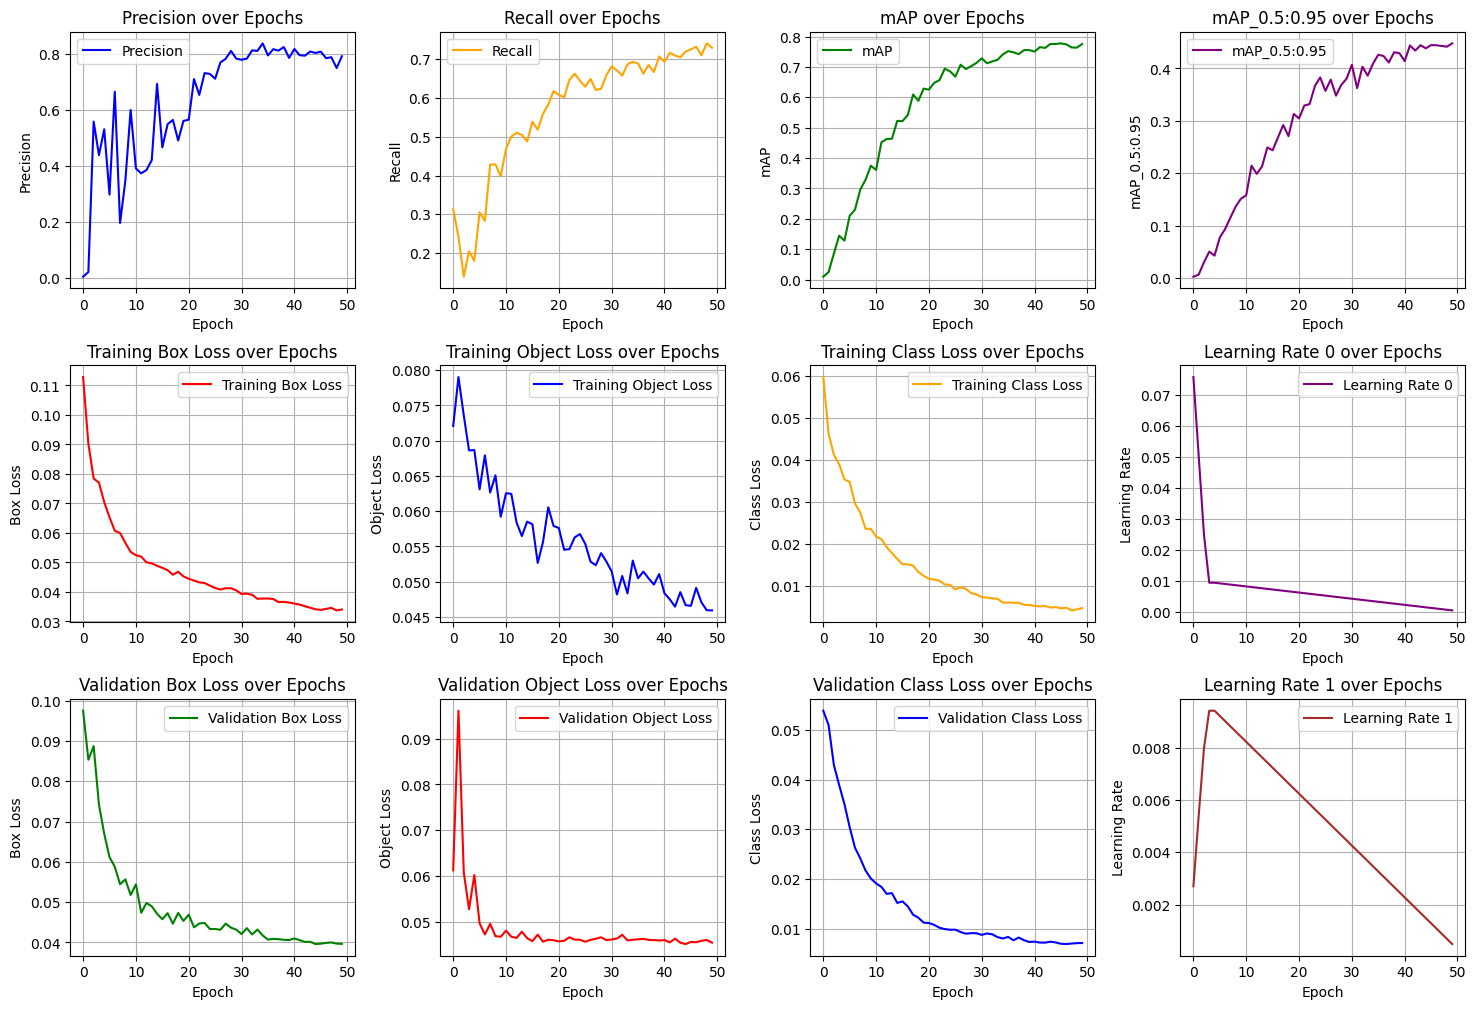

In [ ]:
metrics_df = pd.read_csv(metrics_dir)

# Clean up column names by stripping extra spaces
metrics_df.columns = metrics_df.columns.str.strip()

# Extract metrics
epochs = metrics_df['epoch']
precision = metrics_df['metrics/precision']
recall = metrics_df['metrics/recall']
mAP = metrics_df['metrics/mAP_0.5']
mAP_05_095 = metrics_df['metrics/mAP_0.5:0.95']
train_box_loss = metrics_df['train/box_loss']
train_obj_loss = metrics_df['train/obj_loss']
train_cls_loss = metrics_df['train/cls_loss']
val_box_loss = metrics_df['val/box_loss']
val_obj_loss = metrics_df['val/obj_loss']
val_cls_loss = metrics_df['val/cls_loss']
lr0 = metrics_df['x/lr0']
lr1 = metrics_df['x/lr1']
lr2 = metrics_df['x/lr2']

fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Plot Precision
axs[0, 0].plot(epochs, precision, label='Precision', color='blue')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].set_title('Precision over Epochs')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Recall
axs[0, 1].plot(epochs, recall, label='Recall', color='orange')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].set_title('Recall over Epochs')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot mAP
axs[0, 2].plot(epochs, mAP, label='mAP', color='green')
axs[0, 2].set_xlabel('Epoch')
axs[0, 2].set_ylabel('mAP')
axs[0, 2].set_title('mAP over Epochs')
axs[0, 2].legend()
axs[0, 2].grid(True)

# Plot mAP_0.5:0.95
axs[0, 3].plot(epochs, mAP_05_095, label='mAP_0.5:0.95', color='purple')
axs[0, 3].set_xlabel('Epoch')
axs[0, 3].set_ylabel('mAP_0.5:0.95')
axs[0, 3].set_title('mAP_0.5:0.95 over Epochs')
axs[0, 3].legend()
axs[0, 3].grid(True)

# Plot Training Box Loss
axs[1, 0].plot(epochs, train_box_loss, label='Training Box Loss', color='red')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Box Loss')
axs[1, 0].set_title('Training Box Loss over Epochs')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Training Object Loss
axs[1, 1].plot(epochs, train_obj_loss, label='Training Object Loss', color='blue')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Object Loss')
axs[1, 1].set_title('Training Object Loss over Epochs')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Plot Training Class Loss
axs[1, 2].plot(epochs, train_cls_loss, label='Training Class Loss', color='orange')
axs[1, 2].set_xlabel('Epoch')
axs[1, 2].set_ylabel('Class Loss')
axs[1, 2].set_title('Training Class Loss over Epochs')
axs[1, 2].legend()
axs[1, 2].grid(True)

# Plot Validation Box Loss
axs[2, 0].plot(epochs, val_box_loss, label='Validation Box Loss', color='green')
axs[2, 0].set_xlabel('Epoch')
axs[2, 0].set_ylabel('Box Loss')
axs[2, 0].set_title('Validation Box Loss over Epochs')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Plot Validation Object Loss
axs[2, 1].plot(epochs, val_obj_loss, label='Validation Object Loss', color='red')
axs[2, 1].set_xlabel('Epoch')
axs[2, 1].set_ylabel('Object Loss')
axs[2, 1].set_title('Validation Object Loss over Epochs')
axs[2, 1].legend()
axs[2, 1].grid(True)

# Plot Validation Class Loss
axs[2, 2].plot(epochs, val_cls_loss, label='Validation Class Loss', color='blue')
axs[2, 2].set_xlabel('Epoch')
axs[2, 2].set_ylabel('Class Loss')
axs[2, 2].set_title('Validation Class Loss over Epochs')
axs[2, 2].legend()
axs[2, 2].grid(True)

# Plot Learning Rate 0
axs[1, 3].plot(epochs, lr0, label='Learning Rate 0', color='purple')
axs[1, 3].set_xlabel('Epoch')
axs[1, 3].set_ylabel('Learning Rate')
axs[1, 3].set_title('Learning Rate 0 over Epochs')
axs[1, 3].legend()
axs[1, 3].grid(True)

# Plot Learning Rate 1
axs[2, 3].plot(epochs, lr1, label='Learning Rate 1', color='brown')
axs[2, 3].set_xlabel('Epoch')
axs[2, 3].set_ylabel('Learning Rate')
axs[2, 3].set_title('Learning Rate 1 over Epochs')
axs[2, 3].legend()
axs[2, 3].grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

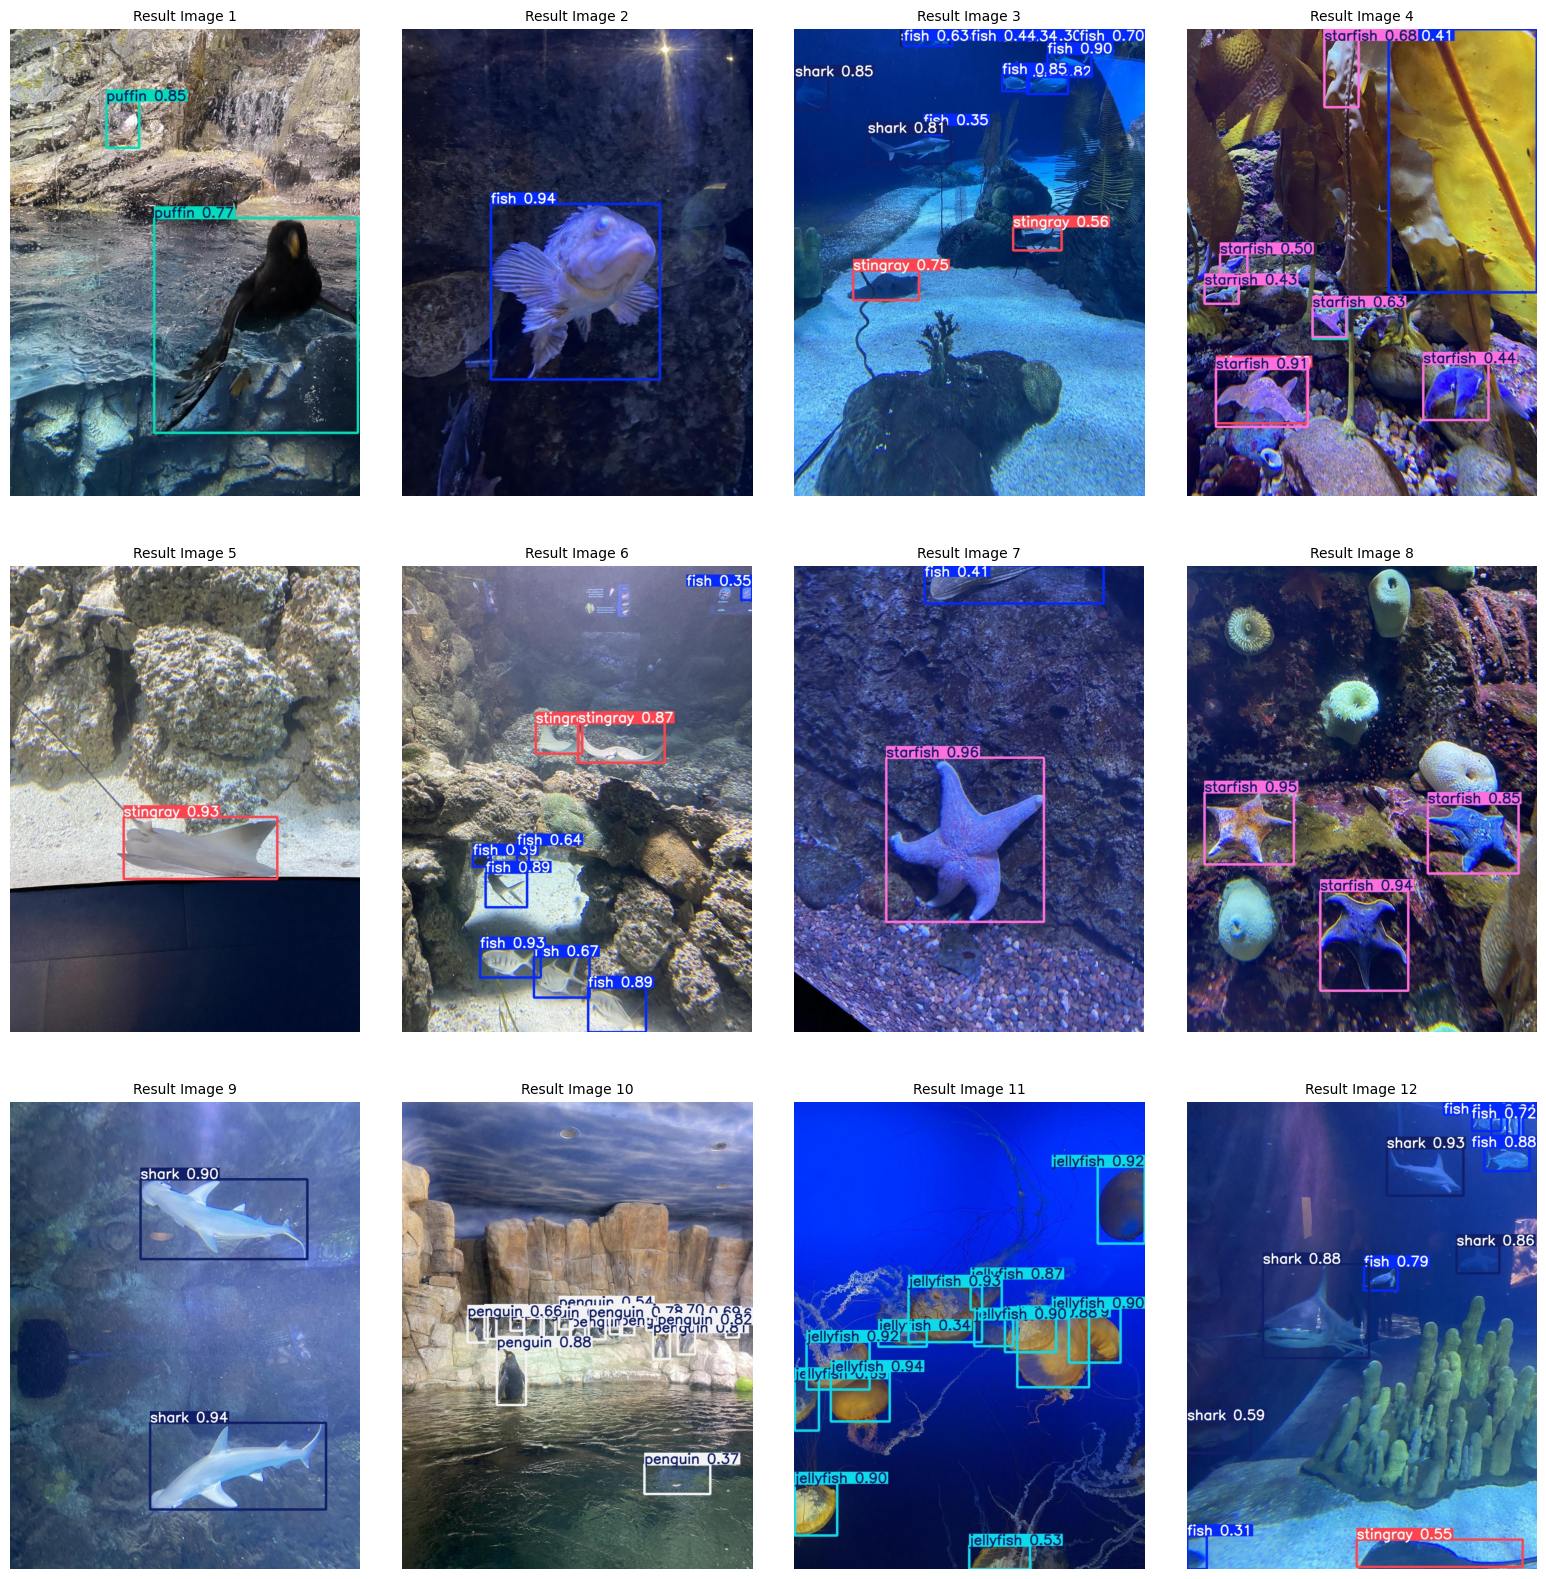

In [ ]:
import cv2

results_dir = 'runs/detect/exp'
result_images = [f for f in os.listdir(results_dir) if f.endswith('.jpg')]

num_images_to_show = min(12, len(result_images))
cols = 4
rows = 3

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
axs = axs.flatten()

for i in range(num_images_to_show):
    img_path = os.path.join(results_dir, result_images[i])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axs[i].imshow(img_rgb)
    axs[i].axis('off')
    axs[i].set_title(f'Result Image {i+1}', fontsize=10)

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.show()